### 0. Version check

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
print(mpl.__version__)

3.2.1


### 1. Pyplot Example

#### 1.1. Line Plot

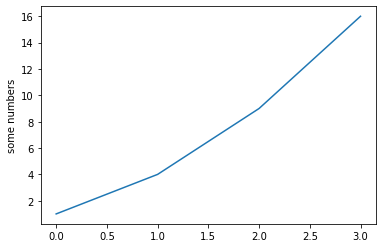

In [2]:
import matplotlib.pyplot as plt
plt.plot([1, 4, 9, 16])
plt.ylabel('some numbers')
plt.show()

#### 2.2. Categorical Plot

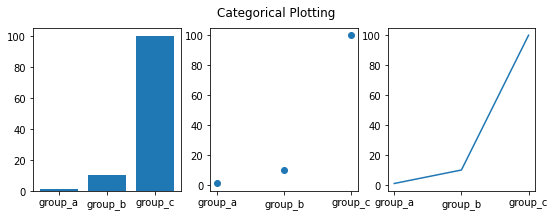

In [3]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.savefig('9_mpla_2.png')


### 2. Object Oriented Interface

#### 2.1. figure and axes

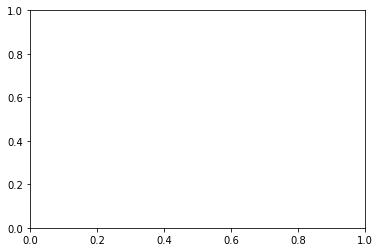

In [4]:
fig, ax = plt.subplots()

plt.show()

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


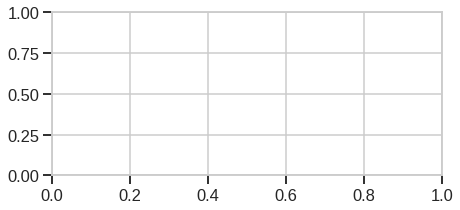

In [5]:
import seaborn as sns

plt.style.use('seaborn-whitegrid')
sns.set_context('talk')

fig, ax = plt.subplots(figsize=(7,3))

plt.show()

#### 2.2. Data Preparation

In [6]:
data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())

#### 2.3. Bar Plot

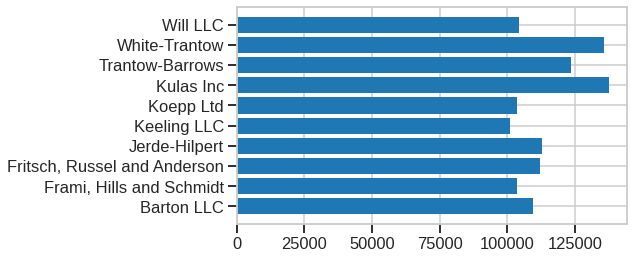

In [7]:
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(group_names, group_data)
plt.show()

In [8]:
import pandas as pd

df = pd.DataFrame.from_dict(data, orient='index', columns=['revenue'])
df

,revenue
Barton LLC,109438.50
"Frami, Hills and Schmidt",103569.59
"Fritsch, Russel and Anderson",112214.71
Jerde-Hilpert,112591.43
Keeling LLC,100934.30
Koepp Ltd,103660.54
Kulas Inc,137351.96
Trantow-Barrows,123381.38
White-Trantow,135841.99
Will LLC,104437.60


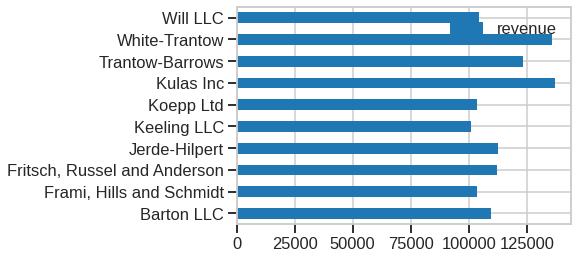

In [9]:
df.plot(kind='barh')

#### 2.4. Color Setting

In [10]:
sns.set_palette('bright')

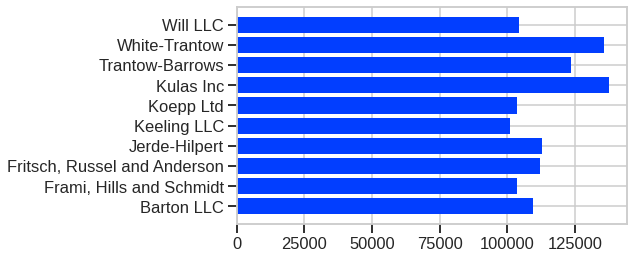

In [11]:
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(group_names, group_data)
plt.show()

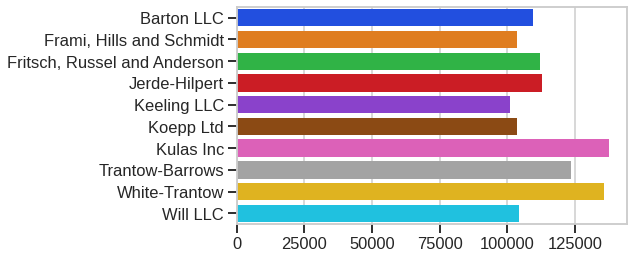

In [12]:
fig, ax = plt.subplots(figsize=(7,4))
sns.barplot(group_data, group_names)
plt.show()

#### 2.5. Titles and Axes Labels

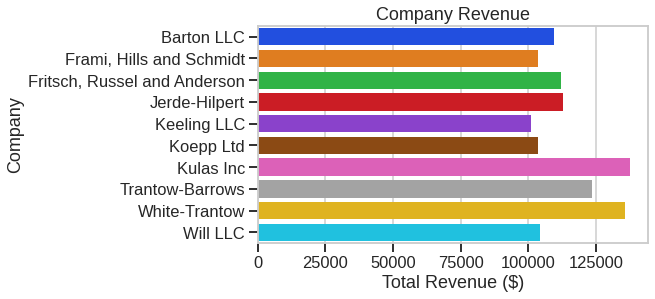

In [13]:
fig, ax = plt.subplots(figsize=(7,4))
sns.barplot(group_data, group_names)

ax.set_xlabel('Total Revenue ($)')
ax.set_ylabel('Company')
ax.set_title('Company Revenue')

plt.show()

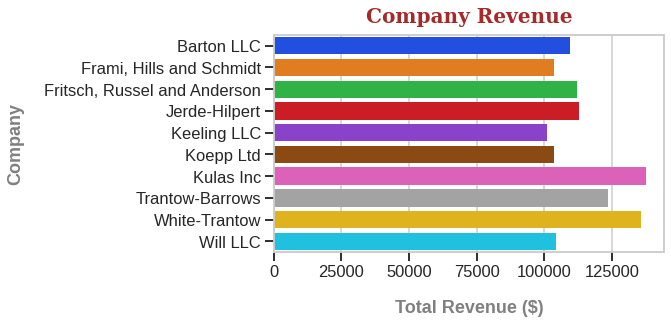

In [14]:
font_label = {
    'color': 'gray',
    'weight': 'bold'
}

font_title = {
    'family': 'serif',
    'size': 20,
#     'backgroundcolor': 'yellow',
    'color': 'brown',
    'weight': 'bold',
    'verticalalignment': 'baseline',
    'horizontalalignment': 'center'
}


fig, ax = plt.subplots(figsize=(7,4))
sns.barplot(group_data, group_names)

ax.set_xlabel('Total Revenue ($)', fontdict=font_label, labelpad=20)
ax.set_ylabel('Company', fontdict=font_label, labelpad=20)
ax.set_title('Company Revenue', fontdict=font_title, pad=12)

plt.show()

#### 2.6. Axis Range and Format

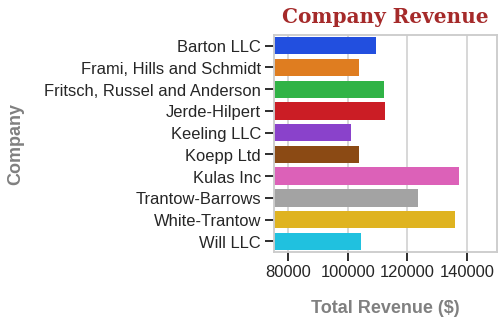

In [15]:
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(group_data, group_names)

ax.set_xlabel('Total Revenue ($)', fontdict=font_label, labelpad=20)
ax.set_ylabel('Company', fontdict=font_label, labelpad=20)
ax.set_title('Company Revenue', fontdict=font_title, pad=12)

ax.set_xlim(75000, 150000)

plt.show()

xlabels type=<class 'numpy.ndarray'>, 
xlabels=[ 60000.  80000. 100000. 120000. 140000. 160000.]


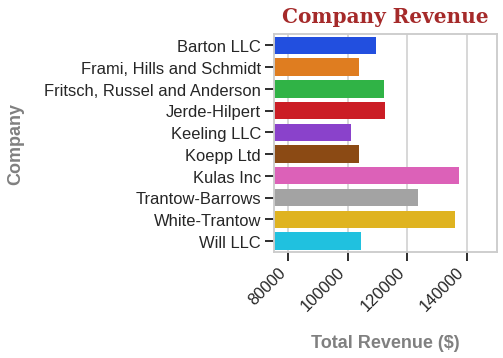

In [16]:
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(group_data, group_names)

ax.set_xlabel('Total Revenue ($)', fontdict=font_label, labelpad=20)
ax.set_ylabel('Company', fontdict=font_label, labelpad=20)
ax.set_title('Company Revenue', fontdict=font_title, pad=12)

ax.set_xlim(75000, 150000)
xlabels = ax.get_xticks()
print(f'xlabels type={type(xlabels)}, \nxlabels={xlabels}')
ax.set_xticklabels(xlabels.astype('int'), rotation=45, 
                   horizontalalignment='right')

plt.show()

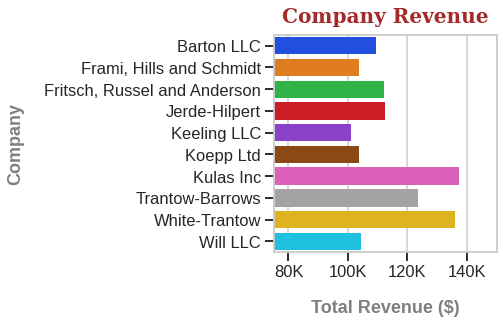

In [17]:
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(group_data, group_names)

ax.set_xlabel('Total Revenue ($)', fontdict=font_label, labelpad=20)
ax.set_ylabel('Company', fontdict=font_label, labelpad=20)
ax.set_title('Company Revenue', fontdict=font_title, pad=12)

ax.set_xlim(75000, 150000)
ax.set_xticklabels([f'{xlabel/1000:0.0f}K' for xlabel in xlabels])

plt.show()

#### 2.7. Additional Information

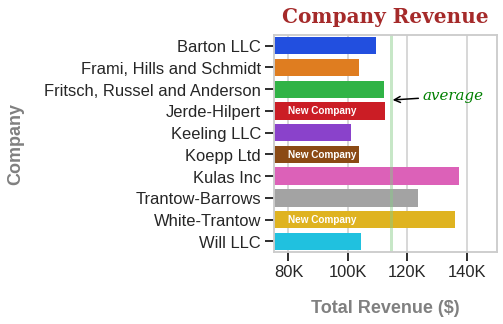

In [18]:
import numpy as np

font_text = {
    'size': 10,
    'color': 'white',
    'weight': 'bold',
    'horizontalalignment': 'left',
    'verticalalignment': 'center'
}

fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(group_data, group_names)

ax.set_xlabel('Total Revenue ($)', fontdict=font_label, labelpad=20)
ax.set_ylabel('Company', fontdict=font_label, labelpad=20)
ax.set_title('Company Revenue', fontdict=font_title, pad=12)

ax.set_xlim(75000, 150000)
ax.set_xticklabels([f'{xlabel/1000:0.0f}K' for xlabel in xlabels])

# Add a vertical line, here we set the style in the function call
group_mean = np.mean(group_data)
ax.axvline(group_mean, ls='-', lw=3, color='#8C87')

# Add average
arrowprops = {
    'arrowstyle': '->'
}
ax.annotate("average", (group_mean, 2.5), xytext=(125000, 2.5),
            color='green', fontfamily='serif', fontstyle='italic', fontsize=15,
            arrowprops=arrowprops)

# Annotate new companies
for group in [3, 5, 8]:
    ax.text(80000, group, "New Company", fontdict=font_text)

plt.show()